<a href="https://colab.research.google.com/github/Eslam-elnahas/Data_Sets-Project/blob/main/Traditional_AI_Classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# **Coding of Data preparation **


from google.colab import drive
drive.mount('/content/drive')

!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite/EgyptDataset'

dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'

dataset_name = "EgyptDataset"



Mounted at /content/drive
total 49K
-rw------- 1 root root  630 Mar 21 14:21  classes.json
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 1'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 10'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 11'
drwx------ 2 root root 4.0K Jun 20 09:52 'Tile 12'
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 2'
drwx------ 2 root root 4.0K Mar 30 12:56 'Tile 3'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 4'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 5'
drwx------ 2 root root 4.0K Jun 20 09:50 'Tile 6'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 7'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 8'
drwx------ 2 root root 4.0K Jun 20 09:51 'Tile 9'


In [2]:
!pip install patchify


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install --force-reinstall --no-cache-dir numpy==1.24.3 pandas==1.5.3 opencv-python-headless patchify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 228.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Success

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from PIL import Image
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from patchify import patchify

In [2]:
# تحسين شامل للكود: تنظيم - تعليقات - رسوم بيانية - حفظ النتائج
# 1. الإعدادات العامة
image_patch_size = 256
scaler = MinMaxScaler()
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/Satellite'
dataset_name = "EgyptDataset"

image_dataset = []
mask_dataset = []

# 2. تحميل البيانات وتقطيع الصور والماسكات إلى patches
for image_type in ['images', 'masks']:
    extension = 'tif' if image_type == 'images' else 'png'

    for tile_id in range(1, 3):
        for image_id in range(1, 20):
            path = f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{extension}'
            img = cv2.imread(path, 1)
            if img is None:
                continue

            if image_type == 'masks':
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # قطع الصورة لتتناسب مع حجم الباتشات
            size_x = (img.shape[1]//image_patch_size)*image_patch_size
            size_y = (img.shape[0]//image_patch_size)*image_patch_size
            img = Image.fromarray(img).crop((0, 0, size_x, size_y))
            img = np.array(img)
            patches = patchify(img, (image_patch_size, image_patch_size, 3), step=image_patch_size)

            for i in range(patches.shape[0]):
                for j in range(patches.shape[1]):
                    patch = patches[i, j, 0]
                    if image_type == 'images':
                        patch = scaler.fit_transform(patch.reshape(-1, 3)).reshape(patch.shape)
                        image_dataset.append(patch)
                    else:
                        mask_dataset.append(patch)

image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

# 3. تعريف ألوان التصنيفات وتحويل RGB إلى Label
class_colors = {
    0: '#8429f6',  # Bare ground
    1: '#0000ff',  # Water
    2: '#9b9b9b',  # Road
    3: '#32cd32',  # Agricultural
    4: '#804000',  # Built-up
    5: '#808080'   # Unlabeled
}

class_rgb = {k: np.array(tuple(int(v.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))) for k, v in class_colors.items()}

def rgb_to_label(mask):
    label = np.zeros(mask.shape[:2], dtype=np.uint8)
    for class_id, color in class_rgb.items():
        label[np.all(mask == color, axis=-1)] = class_id
    return label

labels = np.array([rgb_to_label(mask) for mask in mask_dataset])

# 4. تحويل كل بكسل إلى عينة (لكل مصنف)
X = []
y = []

for i in tqdm(range(image_dataset.shape[0])):
    patch_img = image_dataset[i]  # (256, 256, 3)
    patch_lbl = labels[i]         # (256, 256)
    X.append(patch_img.reshape(-1, 3))
    y.append(patch_lbl.flatten())

X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

# 5. أخذ عينات للتدريب وتقليل الحجم لتسريع العملية
sample_size = 100_000
indices = np.random.choice(len(X), sample_size, replace=False)
X_sampled = X[indices]
y_sampled = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled)

# 6. تدريب المصنفات
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)
}

results = []
y_preds = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds[name] = y_pred
    results.append({
        'Classifier': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })
    print(classification_report(y_test, y_pred, zero_division=0))


100%|██████████| 1152/1152 [00:00<00:00, 53806.66it/s]


Training Random Forest...
              precision    recall  f1-score   support

           0       0.44      0.20      0.28       457
           1       0.88      0.82      0.85      6142
           2       0.00      0.00      0.00        60
           3       0.88      0.94      0.91     12043
           4       0.59      0.57      0.58      1173
           5       0.61      0.09      0.15       125

    accuracy                           0.86     20000
   macro avg       0.57      0.44      0.46     20000
weighted avg       0.85      0.86      0.85     20000

Training SVM...
              precision    recall  f1-score   support

           0       0.27      0.01      0.02       457
           1       0.78      0.62      0.69      6142
           2       0.00      0.00      0.00        60
           3       0.80      0.93      0.86     12043
           4       0.50      0.51      0.50      1173
           5       0.00      0.00      0.00       125

    accuracy                       

      Classifier  Accuracy  Precision   Recall  F1-Score
0  Random Forest   0.85715   0.847590  0.85715  0.849190
1            SVM   0.77950   0.758751  0.77950  0.760883
2            MLP   0.79150   0.780849  0.79150  0.778436


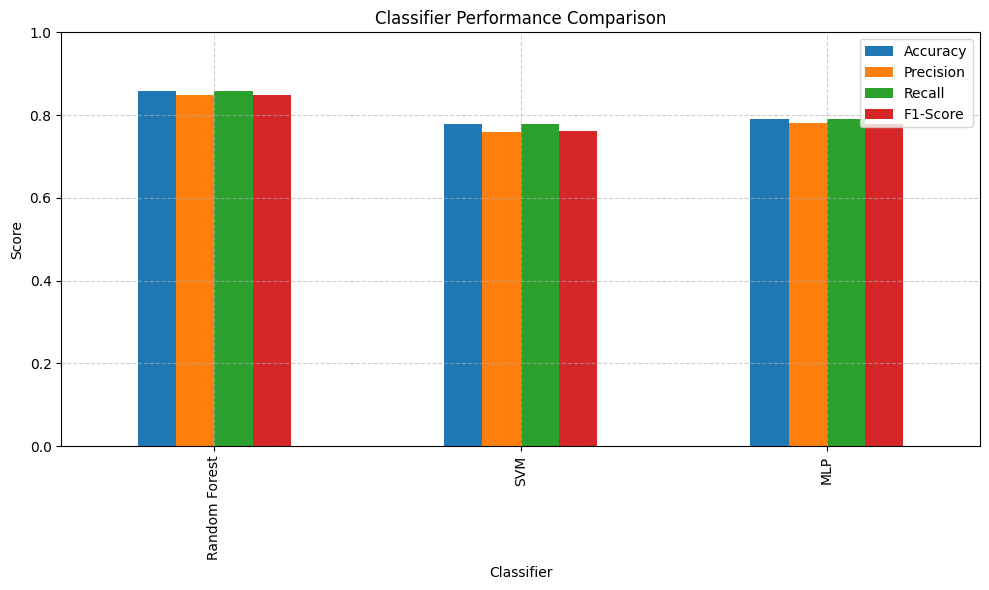

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

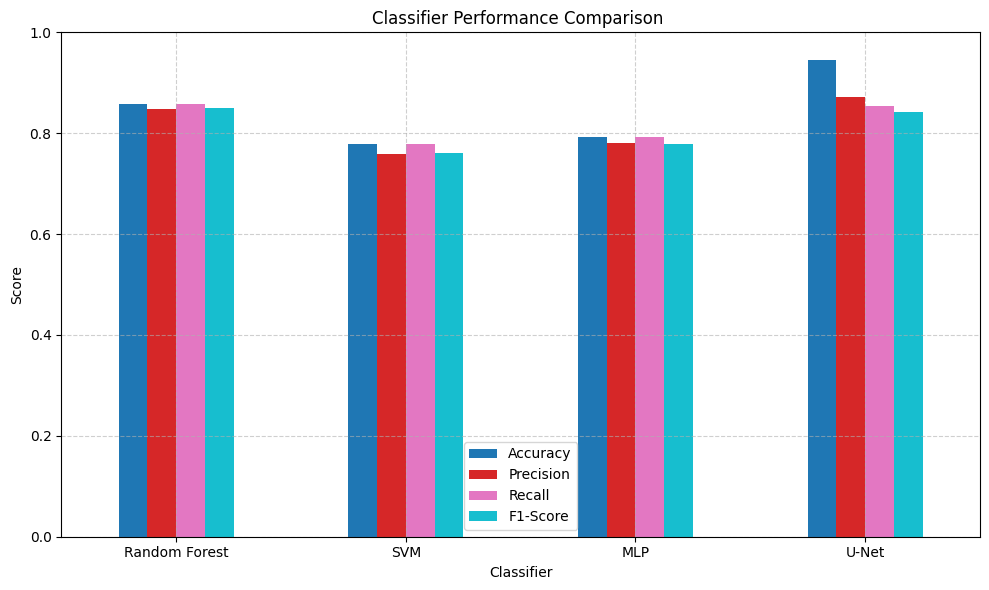

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:

# 7. عرض النتائج
results_df = pd.DataFrame(results)
print(results_df)

# رسم الرسم البياني للمقارنة
results_df.set_index('Classifier')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title("Classifier Performance Comparison")
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# حفظ النتائج إلى ملف CSV
results_df.to_csv("classifier_comparison_results.csv", index=False)
from google.colab import files
files.download("classifier_comparison_results.csv")
# إضافة نتائج U-Net
results_df.loc[len(results_df.index)] = {
    'Classifier': 'U-Net',
    'Accuracy': 0.945,
    'Precision': 0.8713,
    'Recall': 0.8536,
    'F1-Score': 0.8426
}
results_df.columns
results_df.columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df.set_index('Classifier')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]\
    .plot(kind='bar', figsize=(10, 6), colormap='tab10')

plt.title("Classifier Performance Comparison ")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# حفظ النتائج إلى ملف CSV
results_df.to_csv("classifier_comparison_results.csv", index=False)
from google.colab import files
files.download("classifier_comparison_results.csv")


In [5]:
# قائمة المصنفات التي دربناها
# بعد كود التدريب مباشرة
rf = models["Random Forest"]
svm = models["SVM"]
mlp = models["MLP"]

# أسماء الأصناف (اختياري فقط لعرض الألوان أو كتابة العناوين)
class_names = ['Bare Ground', 'Water', 'Road', 'Agricultural', 'Built-up', 'Unlabeled']

# اختيار عينة عشوائية
random_index = random.randint(0, len(image_dataset)-1)
patch_image = image_dataset[random_index]
true_mask = labels[random_index]

# تحضير صورة لإجراء التصنيف عليها
flat_pixels = patch_image.reshape(-1, 3)  # تحويل الصورة (256,256,3) إلى (65536, 3)

plt.figure(figsize=(18, 5))
plt.subplot(1, len(classifiers)+2, 1)
plt.title("Original Patch")
plt.imshow(patch_image)

plt.subplot(1, len(classifiers)+2, 2)
plt.title("Ground Truth")
plt.imshow(true_mask, cmap='tab20')

# اختبار كل مصنف على نفس الصورة
for idx, (name, model) in enumerate(classifiers.items(), start=3):
    predicted_labels = model.predict(flat_pixels)
    predicted_mask = predicted_labels.reshape(patch_image.shape[:2])

    plt.subplot(1, len(classifiers)+2, idx)
    plt.title(f"{name} Prediction")
    plt.imshow(predicted_mask, cmap='tab20')

plt.tight_layout()
plt.show()


NameError: name 'classifiers' is not defined

<Figure size 1800x500 with 0 Axes>

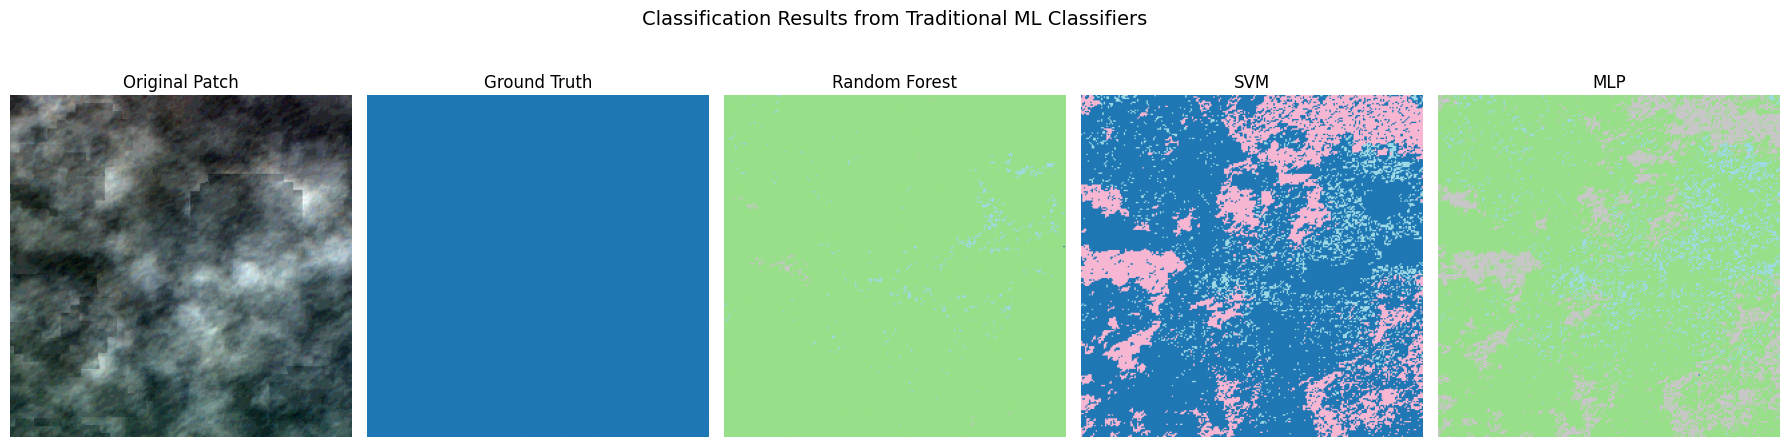

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

# تأكد من أنك قمت مسبقاً بتدريب هذه المصنفات وسميتها كالتالي:
# rf = RandomForestClassifier(...)
# svm = SVC(...)
# mlp = MLPClassifier(...)
# وتدريبهم تم كما في الكود السابق

# 1. تعريف المصنفات المحفوظة بعد التدريب
classifiers = {
    "Random Forest": rf,
    "SVM": svm,
    "MLP": mlp
}

# 2. اختيار باتش عشوائي من الصور الأصلية
random_idx = random.randint(0, len(image_dataset) - 1)
patch_image = image_dataset[random_idx]   # (256, 256, 3)
patch_label = labels[random_idx]          # (256, 256)

# 3. تحويل الباتش إلى بيانات بكسل للتنبؤ
flat_patch = patch_image.reshape(-1, 3)   # (65536, 3)

# 4. إنشاء الشكل للعرض
plt.figure(figsize=(18, 5))

# 4.1 عرض الصورة الأصلية
plt.subplot(1, 5, 1)
plt.title("Original Patch")
plt.imshow(patch_image)
plt.axis('off')

# 4.2 عرض الماسك الحقيقي
plt.subplot(1, 5, 2)
plt.title("Ground Truth")
plt.imshow(patch_label, cmap='tab20')
plt.axis('off')

# 4.3 عرض توقع كل مصنف
for i, (name, clf) in enumerate(classifiers.items()):
    pred_flat = clf.predict(flat_patch)              # (65536,)
    pred_mask = pred_flat.reshape(256, 256)          # (256, 256)

    plt.subplot(1, 5, i + 3)
    plt.title(name)
    plt.imshow(pred_mask, cmap='tab20')
    plt.axis('off')

plt.suptitle("Classification Results from Traditional ML Classifiers", fontsize=14)
plt.tight_layout()
plt.show()


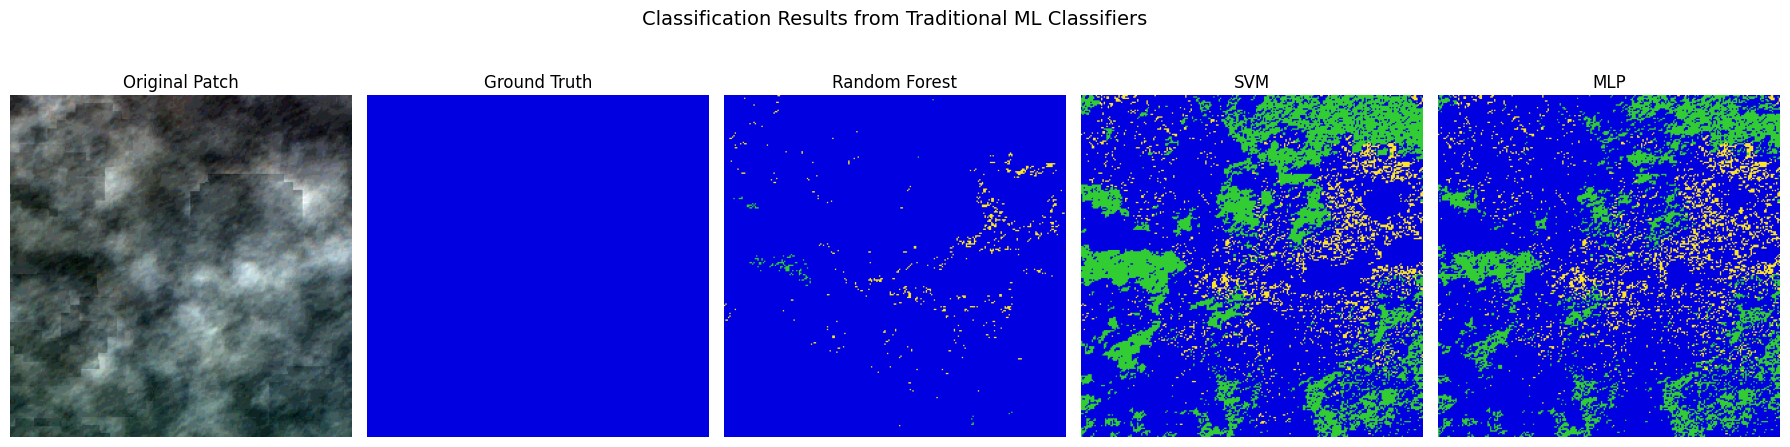

In [26]:
from matplotlib.colors import ListedColormap

# إنشاء خريطة الألوان الموحدة
class_colors = {
    0: '#440154',  # Bare ground
    1: '#0000e1',  # Water
    2: '#9b9b9b',  # Road
    3: '#32cd32',  # Agricultural
    4: '#fde724',  # Built-up
    5: '#8529f6'   # Unlabeled
}
custom_cmap = ListedColormap(list(class_colors.values()))

# عرض الصور
plt.figure(figsize=(18, 5))

plt.subplot(1, 5, 1)
plt.title("Original Patch")
plt.imshow(patch_image)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("Ground Truth")
plt.imshow(patch_label, cmap=custom_cmap, vmin=0, vmax=5)
plt.axis('off')

for i, (name, clf) in enumerate(classifiers.items()):
    pred_flat = clf.predict(flat_patch)
    pred_mask = pred_flat.reshape(256, 256)

    plt.subplot(1, 5, i + 3)
    plt.title(name)
    plt.imshow(pred_mask, cmap=custom_cmap, vmin=0, vmax=5)
    plt.axis('off')

plt.suptitle("Classification Results from Traditional ML Classifiers", fontsize=14)
plt.tight_layout()
plt.show()


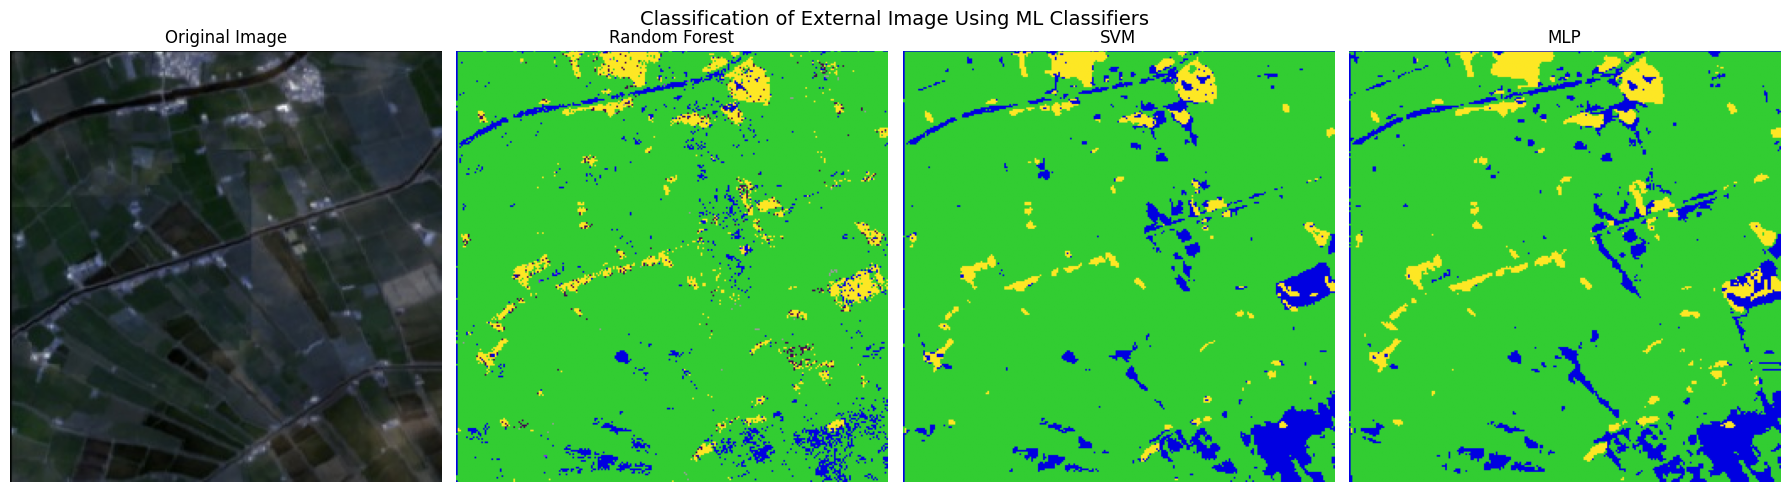

In [37]:
import cv2
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. تحميل الصورة الخارجية
external_path = '/content/sample_data/10.jpg'  # ← ضع مسار الصورة هنا
img = cv2.imread(external_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. التأكد من الحجم (نقص أو قص لأقرب مضاعف لـ 256)
image_patch_size = 256
height, width, _ = img.shape
height = (height // image_patch_size) * image_patch_size
width = (width // image_patch_size) * image_patch_size
img = img[:height, :width]  # Crop

# 3. تصغير (إن لزم)
img_resized = cv2.resize(img, (256, 256))

# 4. تطبيع الصورة (نفس تطبيع التدريب)
scaler = MinMaxScaler()
img_normalized = scaler.fit_transform(img_resized.reshape(-1, 3)).reshape(256, 256, 3)

# 5. تجهيز الشكل للتمثيل (1D لكل بكسل)
flat_img = img_normalized.reshape(-1, 3)

# 6. خريطة الألوان
class_colors = {
    0: '#440154',  # Bare ground
    1: '#0000e1',  # Water
    2: '#9b9b9b',  # Road
    3: '#32cd32',  # Agricultural
    4: '#fde724',  # Built-up
    5: '#8529f6'   # Unlabeled
}
custom_cmap = ListedColormap(list(class_colors.values()))

# 7. التنبؤ بالمصنفات
plt.figure(figsize=(18, 5))
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img_resized)
plt.axis('off')

for i, (name, clf) in enumerate(classifiers.items()):
    prediction = clf.predict(flat_img)
    prediction_mask = prediction.reshape(256, 256)

    plt.subplot(1, 4, i + 2)
    plt.title(name)
    plt.imshow(prediction_mask, cmap=custom_cmap, vmin=0, vmax=5)
    plt.axis('off')

plt.suptitle("Classification of External Image Using ML Classifiers", fontsize=14)
plt.tight_layout()
plt.show()
